# Problema 4

Para este punto utilizaremos la ecuacion de cono generada por X^2+y^2-(1/3)z^2=0

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import random

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from mpl_toolkits import mplot3d

Utilizaremos la acuacion pero en coordenadas polares, luego tomaremos unos puntos aleatorios para entrenar la red, y graficamos esos puntos.

In [3]:
theta= np.linspace(0,2*np.pi,100)
random.shuffle(theta)
r= np.linspace(0,30,100)
random.shuffle(r)
x=r*1/2* np.cos(theta)  
y=r*1/2*np.sin(theta)
z=r*(3)**(1/2)/2

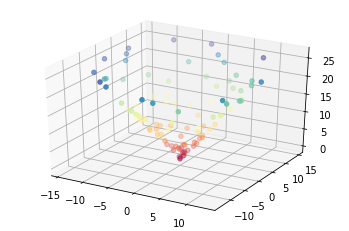

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = x
ydata = y
zdata = z
stride=2
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Spectral')
plt.show()


In [5]:
train  = pd.DataFrame(data={'x1': x,'y': y})

Construir una red neuronal

In [6]:
def nn_model():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(train.shape[1],)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
model = nn_model()

In [8]:
resultados = model.fit( train,  z, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 271.0592 - mae: 14.2791 - val_loss: 219.0913 - val_mae: 12.6991
Epoch 2/100
3/3 - 0s - loss: 253.5837 - mae: 13.8018 - val_loss: 209.0039 - val_mae: 12.3965
Epoch 3/100
3/3 - 0s - loss: 241.7186 - mae: 13.4743 - val_loss: 199.1284 - val_mae: 12.1005
Epoch 4/100
3/3 - 0s - loss: 230.8780 - mae: 13.1651 - val_loss: 191.9224 - val_mae: 11.8794
Epoch 5/100
3/3 - 0s - loss: 222.0527 - mae: 12.9054 - val_loss: 184.0817 - val_mae: 11.6338
Epoch 6/100
3/3 - 0s - loss: 212.1194 - mae: 12.6099 - val_loss: 175.9584 - val_mae: 11.3724
Epoch 7/100
3/3 - 0s - loss: 202.4965 - mae: 12.3135 - val_loss: 170.6656 - val_mae: 11.2006
Epoch 8/100
3/3 - 0s - loss: 195.6749 - mae: 12.1001 - val_loss: 165.1703 - val_mae: 11.0149
Epoch 9/100
3/3 - 0s - loss: 188.6697 - mae: 11.8814 - val_loss: 158.8273 - val_mae: 10.7958
Epoch 10/100
3/3 - 0s - loss: 180.9865 - mae: 11.6288 - val_loss: 153.1176 - val_mae: 10.5965
Epoch 11/100
3/3 - 0s - loss: 173.8994 - mae: 11.3927 - val_loss: 147

Epoch 93/100
3/3 - 0s - loss: 0.3150 - mae: 0.4698 - val_loss: 0.3412 - val_mae: 0.5069
Epoch 94/100
3/3 - 0s - loss: 0.3152 - mae: 0.4732 - val_loss: 0.3068 - val_mae: 0.4623
Epoch 95/100
3/3 - 0s - loss: 0.2891 - mae: 0.4557 - val_loss: 0.3078 - val_mae: 0.4810
Epoch 96/100
3/3 - 0s - loss: 0.2710 - mae: 0.4410 - val_loss: 0.2274 - val_mae: 0.4064
Epoch 97/100
3/3 - 0s - loss: 0.2870 - mae: 0.4554 - val_loss: 0.2260 - val_mae: 0.3992
Epoch 98/100
3/3 - 0s - loss: 0.2603 - mae: 0.4222 - val_loss: 0.3256 - val_mae: 0.4928
Epoch 99/100
3/3 - 0s - loss: 0.2798 - mae: 0.4509 - val_loss: 0.3205 - val_mae: 0.4901
Epoch 100/100
3/3 - 0s - loss: 0.2451 - mae: 0.4227 - val_loss: 0.2290 - val_mae: 0.4035


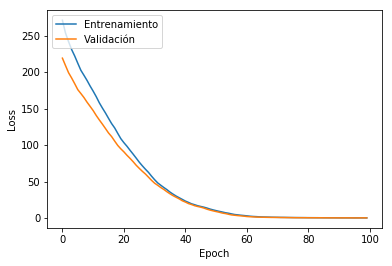

In [9]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


Ahora creamos datos aleatorios en un region del palno para hacer una prediccion de como se verian.

In [10]:
thetat= np.linspace(0,2*np.pi,4000)
random.shuffle(thetat)
rt= np.linspace(0,50,4000)
random.shuffle(rt)
xt=rt*1/2* np.cos(thetat)  
yt=rt*1/2*np.sin(thetat)
zt=rt*1/2
testx  = pd.DataFrame(data={'x1': xt,'y': yt})

In [11]:
test_mse_score, test_mae_score = model.evaluate(testx, zt)
test_mae_score

125/125 [==============================] - 0s 1ms/step - loss: 98.4171 - mae: 8.7253


8.725271224975586

Sobre estos datos ahora Predecimos el comportamiento y graficamos de dos formas distintas.

In [12]:
k = model.predict(testx)
Predict=[]
for sublist in k:
    for item in sublist:
        Predict.append(item)  
   




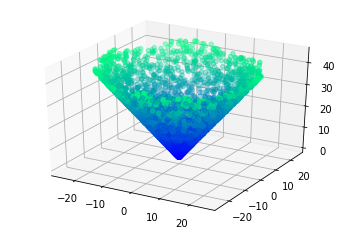

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xt,yt, Predict, c=Predict, cmap='winter')
plt.show()

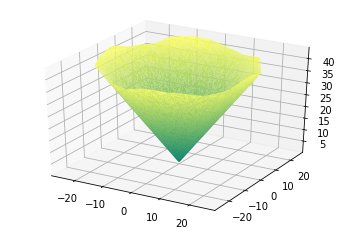

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xt, yt, Predict,  linewidth=0.2, cmap='summer')
plt.show()

Obteniendo asi la forma de un cono.